# Interpolación y ajuste de curvas (fiteo)  <a class="tocSkip">

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
fsize= (9,6)

## Interpolación

Muchas veces tenemos datos medidos variando algún parámetro en las condiciones, y estos datos están medidos a intervalos mayores de los que deseamos. En estos casos es común tratar de inferir los valores que tendrían las mediciones para valores intermedios de nuestro parámetro. Una opción es interpolar los datos. Algunas facilidades para ello están en el subpaquete **interpolate** del paquete **Scipy**. Generemos algunos "datos experimentales"

In [2]:
def fmodel(x):
  return (np.sin(x))**2*np.exp(-(x/3.5)**2)

In [3]:
x0 = np.linspace(0., 2*np.pi, 60)
y0 = fmodel(x0)
x = np.linspace(0., 2*np.pi, 8)
y = fmodel(x)

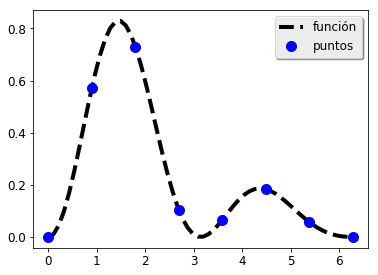

In [4]:
plt.plot(x0,y0,'--k', label='función')
plt.plot(x,y,'ob', label='puntos')
plt.legend(loc='best')

Acá hemos simulado datos con una función oscilante con un decaimiento exponencial.  Ahora, importamos el módulo adecuado para interpolar

In [5]:
from scipy import interpolate

La interpolación funciona en dos pasos. En la primera realizamos todos los cálculos y obtenemos la función interpolante, y en la segunda utilizamos esa función interpolar en los puntos sobre el eje x que necesitamos

In [6]:
interpol_lineal = interpolate.interp1d(x, y)

In [7]:
interpol_lineal # función

In [8]:
x1 = np.linspace(0, 2*np.pi, 33)
y1_l= interpol_lineal(x1)

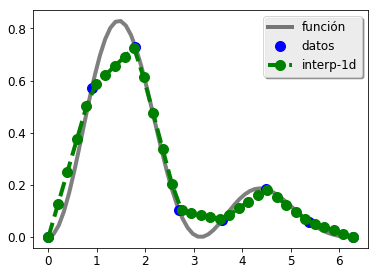

In [9]:
plt.plot(x0,y0, '-k', label='función', alpha=0.5)
plt.plot(x, y,'ob', label='datos')
plt.plot(x1, y1_l,'--og', label='interp-1d')
plt.legend(loc='best')

Para realizar interpolaciones lineales (una recta entre pares de puntos) también se puede utilizar la rutina `interp()` del módulo **Numpy**, cuyos argumentos requeridos son: los puntos `x1` donde queremos interpolar, los valores de `x` y los valores de `y` de la tabla a interpolar:

In [10]:
y1_n= np.interp(x1,x,y)

In [11]:
np.all(y1_n == y1_l)

True

Cuando creamos la función con `interp1d` podemos aplicarla a diferentes conjuntos de valores de x:

In [12]:
y2_l = interpol_lineal(x1)

La interface `interp1d()` tiene un argumento opcional, `kind`, que define el tipo de interpolación a utilizar. Cuando utilizamos el argumento 'nearest' utiliza para cada valor el más cercano

In [13]:
interpol_near = interpolate.interp1d(x, y, kind='nearest')
y1_n = interpol_near(x1)

33 33 8


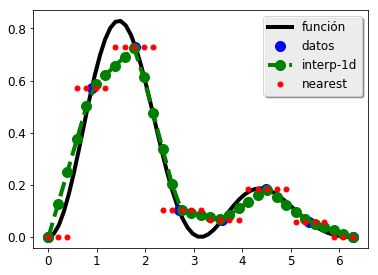

In [14]:
plt.plot(x0,y0, '-k', label='función')
plt.plot(x, y,'ob', label='datos')
plt.plot(x1, y1_l,'--og', label='interp-1d')
plt.plot(x1, y1_n,'.r', label='nearest')
plt.legend(loc='best');
print(x1.size, x1.size, x.size)

### Interpolación con polinomios

**Scipy** tiene rutinas para interpolar con un polinomio todos los datos

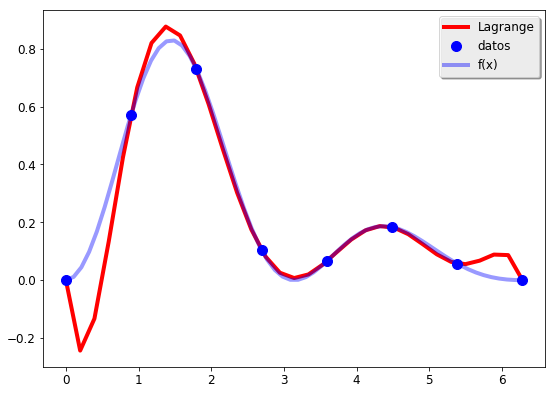

In [15]:
f = interpolate.lagrange(x, y)
y2 = f(x1)
plt.figure(figsize=fsize)
plt.plot(x1,y2,'r-', label='Lagrange')
plt.plot(x,y,'ob', label='datos')
plt.plot(x0,y0,'-b', label='f(x)', alpha=0.4)
plt.legend(loc='best')

Los polinomios interpolantes pueden tener problemas, principalmente en las puntas, o cuando el grado del polinomio es muy alto:

Número de datos: 33


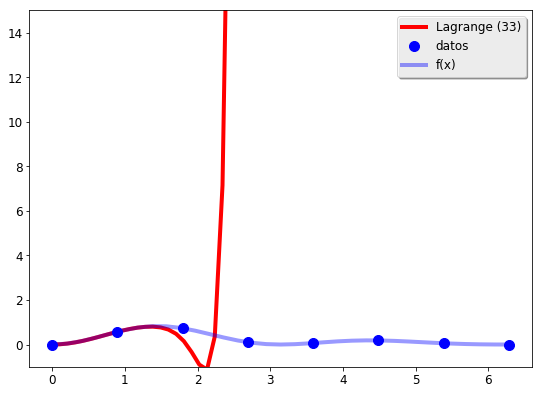

In [16]:
plt.figure(figsize=fsize)
f1 = interpolate.lagrange(x1, fmodel(x1))
plt.plot(x0,f1(x0),'r-', label='Lagrange ({})'.format(x1.size))
plt.plot(x,y,'ob', label='datos')
plt.plot(x1,fmodel(x1),'-b', label='f(x)', alpha=0.4)
plt.ylim((-1,15))
plt.legend(loc='best')
print('Número de datos:', x1.size)

De todas maneras, en los casos en que es aplicable, existen dos implementaciones: `interpolate.lagrange()` y una segunda llamada `interpolate.barycentric_interpolate()` que está basada en un trabajo de 2004 y es numéricamente más estable.

### Splines

-  Las *Splines* son interpolaciones por polinomios de a trazos, que se eligen para que no sólo los valores sino también sus derivadas coincidan dando una curva suave.
-  Para eso se pide que los puntos en que coinciden sean los dados. De esta manera es efectivamente una **interpolación**.
-  Cubic Splines se refiere a que utilizamos polinomios cúbicos en cada trozo

El argumento opcional `kind` de la interface `interp1d()`, que define el tipo de interpolación a utilizar, acepta valores del tipo *string* que pueden ser: 'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', o un número entero indicando el orden.

In [17]:
interp = {}
for k in ['zero', 'slinear', 'quadratic', 'cubic']:
  interp[k] = interpolate.interp1d(x,y, kind=k)

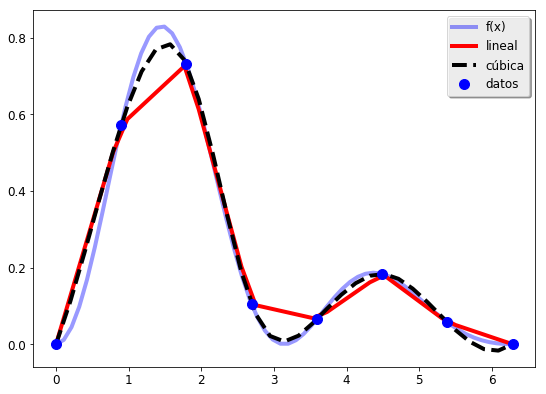

In [18]:
fig= plt.figure(figsize=fsize)
plt.plot(x0,y0,'-b', alpha=0.4, label='f(x)')
plt.plot(x1,interp['slinear'](x1),'-r', label='lineal')
plt.plot(x1,interp['cubic'](x1),  '--k', label=u'cúbica')
plt.plot(x,y,'ob', label='datos')
plt.legend(loc='best')

Tratamos de meter todo en un sólo gráfico (y rogamos que se entienda algo) 

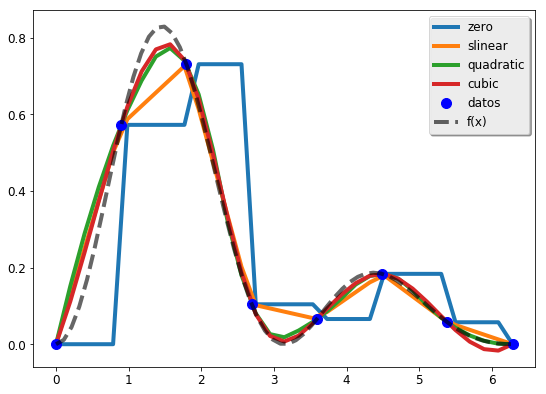

In [19]:
plt.figure(figsize=fsize)
for k, v in interp.items():
  plt.plot(x1, v(x1), label=k)
plt.plot(x,y,'ob', label='datos')
plt.plot(x0,y0,'--k', alpha=0.6, label='f(x)')
plt.legend(loc='best')

En resumen, los métodos disponibles en `interpolate.interp1d` son:

|  `kind ` (tipo)     | Descripción                                            |
| ------------------- | ------------------------------------------------------ |
| 'linear'            | Interpolación lineal, utilizando rectas (default)      |
| 'nearest'           | Valor constante correspondiente al dato más cercano    |
| 'zero' o  `0`       | Una spline de orden cero. Toma el valor a la izquierda |
| 'slinear' o  `1`    | Spline de orden 1. Igual a 'linear'                    |
| 'quadratic' o `2`   | Spline de segundo orden                                |
| 'cubic' o  `3`      | Spline de tercer orden                                 |



Además de los argumentos `zero`, `slinear`, `quadratic`, `cubic` para especificar splines de cero, primer, segundo y tercer orden se puede pasar como argumento un número. En ese caso se utiliza siempre **splines** y el número indica el orden de las splines a utilizar.

In [20]:
for k,s in zip([0,1,2,3], ['zero','slinear','quadratic','cubic']):
  num = interpolate.interp1d(x,y, kind=k)
  tipo = interpolate.interp1d(x,y, kind=s)
  print(np.allclose(num(x1), tipo(x1)))

True
True
True
True


Además La interpolación lineal es en la práctica igual a la spline de primer orden:

In [21]:
np.allclose(interp['slinear'](x1), interpol_lineal(x1)) # También son iguales

True

Finalmente, veamos la diferencia entre la interpolación `nearest` y la spline de orden cero (`zero`)

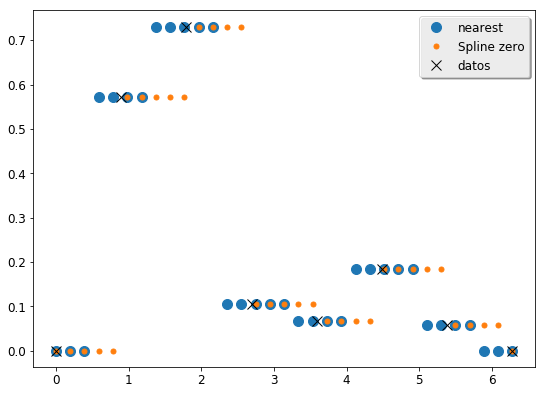

In [22]:
alfa=1
plt.figure(figsize=fsize)
plt.plot(x1, y1_n,'o', label='nearest', alpha=alfa)
plt.plot(x1, interp['zero'](x1), '.', label='Spline zero'.format(k), alpha=alfa)
plt.plot(x,y,'xk', label='datos')

plt.legend(loc='best')

El submódulo `signal` tiene rutinas adicionales para realizar *splines*, que permiten agregar un "alisado", pero en este caso ya no interpolan estrictamente sino que puede ser que la aproximación no pase por los puntos dados.

### B-Splines

Hay otra opción para realizar interpolación con Splines en Scipy. Las llamadas **B-Splines** son funciones diseñadas para generalizar polinomios, con un alto grado de **localidad**.

Para definir las **B-Splines** necesitamos dos cosas: 

  1. Elegir el grado de los polinomios (mayor o igual a 0)
  2. Dividir el intervalo en $n$ "nodos" 

Las funciones se definen mediante la recursión:

\begin{align}\begin{aligned}N_{i, 0}(x) &= 1,\qquad \qquad \textrm{si $t_i \le x < t_{i+1}, \qquad \qquad$ sino $0$,}\\
N_{i, k}(x) &= \frac{x - t_i}{t_{i+k} - t_i} N_{i, k-1}(x)
         + \frac{t_{i+k+1} - x}{t_{i+k+1} - t_{i+1}} N_{i+1, k-1}(x)\end{aligned}\end{align}

Las más simples, cuando el orden es k=0, son funciones constantes a trozos
![](figuras/bsplines0.png)

Para $k>0$ las funciones se calculan por recurrencia en término de dos funciones del orden anterior. Entonces, siempre serán diferentes de cero sólo en un intervalo finito. 
En ese intervalo presentan un único máximo y luego decaen suavemente. Las más usuales son las de orden $k=3$:

![](figuras/bsplines.png)

(Figura de http://www.brnt.eu/phd)

Veamos cómo usarlas para interpolar datos:

In [23]:
tck0 = interpolate.splrep(x,y)

Acá, otra vez operamos en dos pasos. En el primero creamos la representación de las splines para los datos dados.
Como no pusimos explícitamente el orden, utiliza el valor por default `k=3`.

En el segundo paso obtenemos los valores interpolados sobre la grilla `x2`:

In [25]:
x2 = np.linspace(0, 2*np.pi, 60)
y_s0 = interpolate.splev(x2, tck0)

In [27]:
y_s0.shape, y_s0[:3]

((60,), array([-1.85042731e-17,  5.79325504e-02,  1.22001912e-01]))

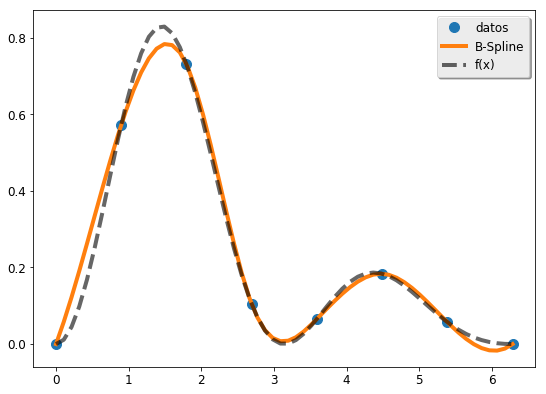

In [28]:
plt.figure(figsize=fsize)
plt.plot(x,y,'o', label='datos')
plt.plot(x2,y_s0,'-', label=r'B-Spline')
plt.plot(x0,y0,'--k', alpha=0.6, label='f(x)')
plt.legend(loc='best');

Estas funciones interpolan los datos con curvas continuas y con derivadas segundas continuas.

### Lines are guides to the eyes

Sin embargo, estas rutinas no necesariamente realizan *interpolación* en forma estricta, pasando por todos los puntos dados, sino que pueden realizar un fiteo por cuadrados mínimos. Muchas veces tenemos datos que tienen mucha dispersión. En esos casos en que necesitamos curvas que *no necesariamente* pasen por todos los puntos

La rutina `splrep` tiene otros argumentos opcionales. Entre ellos un parámetro de suavizado `s`. Veamos más o menos como funciona. Creemos una tabla de valores `x, y` 
con $x \in [0,2\pi]$ **no necesariamente equiespaciados**, $y=\sin(x)/2$, donde le agregamos algo de ruido a `y`

In [29]:
# Creamos dos tablas de valores x, y
x3 = np.linspace(0., 2*np.pi, 40)
x3[5:-5] -= 0.25*np.random.random(30) # Le agregamos una separación al azar
x3.sort()
y3 = 0.5* np.sin(x3) * (1+ 0.6*(0.5-np.random.random(x3.size)))

# Grilla donde evaluar la función interpolada
x1 = np.linspace(0, 2*np.pi, 90)

In [30]:
tck0 = interpolate.splrep(x3,y3, s=0)  # Interpolación con B-Splines
y_s0 = interpolate.splev(x1,tck0)
tck3 = interpolate.splrep(x3,y3,s=0.3) # Interpolación con suavizado
y_s3 = interpolate.splev(x1,tck3)

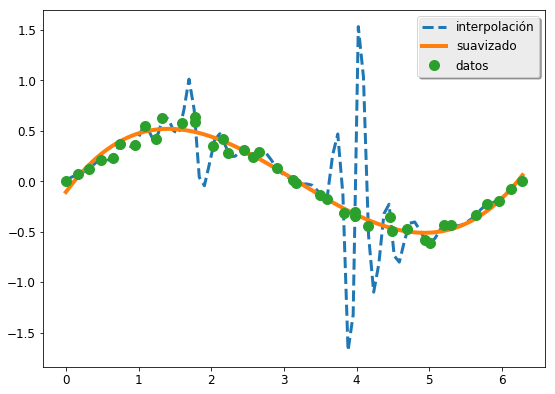

In [31]:
plt.figure(figsize=fsize)
plt.plot(x1,y_s0,'--', lw=3, label=u'interpolación' )
plt.plot(x1,y_s3, "-",  label=u'suavizado');
plt.plot(x3,y3,'o', label='datos' )
plt.legend(loc='best');


El valor del parámetro `s` determina cuanto se suaviza la curva. El valor por default `s=0` corresponde a interpolación, y el suavizado máximo corresponde a `s=1`

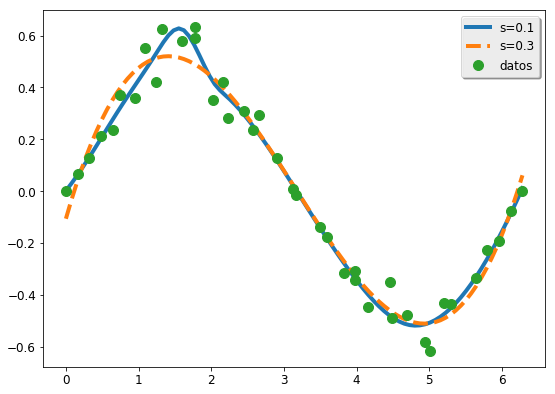

In [32]:
tck1 = interpolate.splrep(x3,y3, s=0.1)  # Interpolación con suavizado
y_s1 = interpolate.splev(x1,tck1)
plt.figure(figsize=fsize)
plt.plot(x1,y_s1, "-",  label=u's=0.1');
plt.plot(x1,y_s3, "--",  label=u's=0.3');
plt.plot(x3,y3,'o', label='datos' )
plt.legend(loc='best');

### Cantidades derivadas de *splines*

De la interpolación (suavizada) podemos calcular, por ejemplo,  la derivada.

In [33]:
yder= interpolate.splev(x1,tck3,der=1) #  Derivada

Si tenemos sólo los datos podríamos tratar de calcular la derivada como el coseno
$$ y' = 0.5 \sqrt{1 - (2y)^2} $$

In [34]:
cond = (x3 > np.pi/2) & (x3 < 3*np.pi/2)
yprima1 = np.where(cond, -1, 1) * 0.5*np.sqrt(np.abs(1 - (2*y3)**2))

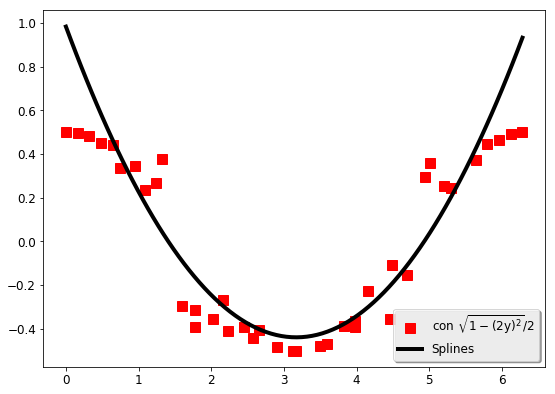

In [35]:
plt.figure(figsize=fsize)
plt.plot(x3, yprima1,"sr", label=r"con $\sqrt{1-(2y)^2}/2$")
plt.plot(x1,yder,'-k', label=u'Splines')
plt.legend(loc='best');

o la integral, o las raíces de la función

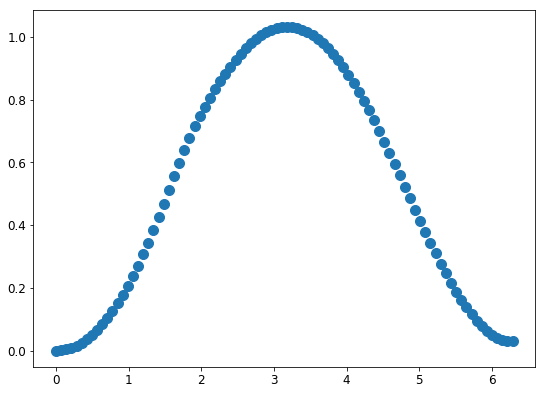

In [36]:
plt.figure(figsize=fsize)
yt= np.array([interpolate.splint(0,t,tck1) for t in x1])
plt.plot(x1,yt,'o');

In [37]:
print("La función se anula en {0} y en {1} de pi".format(*(interpolate.sproot(tck1)/np.pi)))

La función se anula en 1.0112161241830868 y en 1.9939244211080729 de pi


## Interpolación en dos dimensiones

El caso más simple de interpolación en dos dimensiones ocurre cuando tenemos los datos sobre una grilla, que puede no estar equiespaciada. En ese caso podemos usar `scipy.interpolate.interp2d()` para interpolar los datos a una grilla equiespaciada. El método necesita conocer los datos sobre la grilla, y los valores de `x` e `y` a los que corresponden.

Supongamos que tenemos una grilla donde están definidos nuestros datos

In [38]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
  return 5*y*(1-x)*np.cos(4*np.pi*x) * np.exp(-y/2)

x = np.linspace(0, 4, 13)
y = np.array([0, 1, 2, 3.75, 3.875, 3.9375, 4])


In [39]:
# 
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

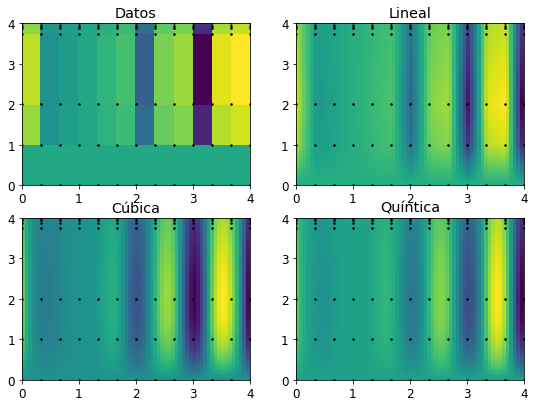

In [41]:
# Grilla en la cual interpolar
x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
# Notar que le tenemos que pasar los arrays unidimensionales x e y
f1 = interpolate.interp2d(x, y, Z, kind='linear')
Z1 = f1(x2, y2)
f3 = interpolate.interp2d(x, y, Z, kind='cubic')
Z3 = f3(x2, y2)
f5 = interpolate.interp2d(x, y, Z, kind='quintic')
Z5 = f5(x2, y2)


fig, ax = plt.subplots(figsize=fsize, nrows=2, ncols=2)

# Solo para graficar
X2, Y2 = np.meshgrid(x2, y2)

# Agregamos los puntos de la grilla
for (i,j),a in np.ndenumerate(ax):
  ax[i,j].plot(X,Y,'.k', markersize=3)

ax[0,0].pcolormesh(X, Y, Z)
ax[0,0].set_title('Datos')
ax[0,1].pcolormesh(X2, Y2, Z1)
ax[0,1].set_title('Lineal')
ax[1,0].pcolormesh(X2, Y2, Z3)
ax[1,0].set_title('Cúbica')
ax[1,1].pcolormesh(X2, Y2, Z5)
ax[1,1].set_title('Quíntica')
plt.show()

Acá usamos `numpy.meshgrid()` que permite generar grillas bidimensionales a partir de dos vectores unidimensionales. Por ejemplo de
```python
X, Y = np.meshgrid(x,y)
```
obtenemos

In [42]:
x.shape, y.shape, X.shape, Y.shape

((13,), (7,), (7, 13), (7, 13))

In [43]:
print(x)
print(X[0])
print(X[1])
print(np.all(x==X[0]))
print(np.all(x==X[-2]))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.        ]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.        ]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.        ]
True
True


In [44]:
print(y)
print(Y[:,0])
print(Y[:,1])
print(Y[:,2])

[0.     1.     2.     3.75   3.875  3.9375 4.    ]
[0.     1.     2.     3.75   3.875  3.9375 4.    ]
[0.     1.     2.     3.75   3.875  3.9375 4.    ]
[0.     1.     2.     3.75   3.875  3.9375 4.    ]


Veámoslo con un ejemplo más simple

In [47]:

a = np.arange(3)
b = np.arange(3,7)
A,B = np.meshgrid(a,b)
print(' a=', a,'\n','b=', b)

 a= [0 1 2] 
 b= [3 4 5 6]


In [48]:
print('A=\n', A,'\n')
print('B=\n', B)

A=
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]] 

B=
 [[3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]]


## Interpolación sobre datos no estructurados

Si tenemos datos, correspondientes a una función o una medición sólo sobre algunos valores $(x,y)$ que no se encuentran sobre una grilla, podemos interpolarlos a una grilla regular usando `griddat()`. Veamos un ejemplo de uso

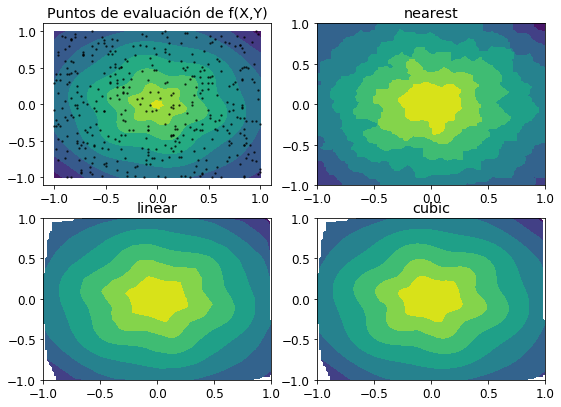

In [53]:
# Generamos los datos
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau


# Generamos los puntos x,y,z en una grilla para comparar con la interpolación
# Notar que es una grilla de 100x100 = 10000 puntos
x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)
T = f(X, Y)

# Elegimos npts puntos al azar de la función
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)
# Estos son los datos a interpolar
Z = f(px, py)

# Graficación:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=fsize)

# Graficamos la función sobre la grilla estructurada a modo de ilustración
# Graficamos los puntos seleccionados
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px, py, c='k', alpha=0.6, marker='.', s=8)
ax[0,0].set_title('Puntos de evaluación de f(X,Y)')

# Interpolamos usando los distintos métodos y graficamos
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = interpolate.griddata((px, py), Z, (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('{}'.format(method))




In [54]:
plt.contourf?

## Fiteos de datos

### Ajuste con polinomios

Habitualmente realizamos ajustes sobre datos que tienen incertezas o ruido. Generemos estos datos (con ruido normalmente distribuido)

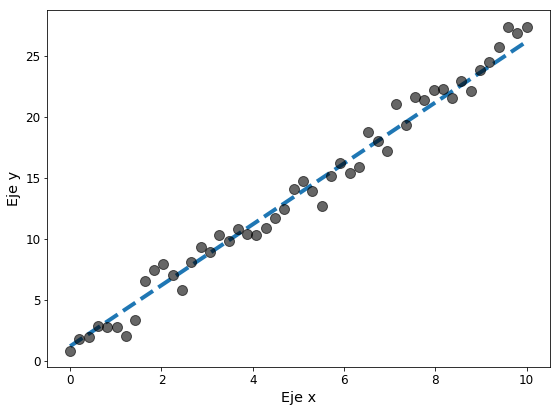

In [55]:
plt.figure(figsize=fsize)
x = np.linspace(0, 10, 50)
y0 = 2.5*x + 1.2
ruido = np.random.normal(loc= 0., scale= 1, size= y0.size)
y = y0 + ruido
plt.plot(x,y0,'--')
plt.plot(x,y, 'ok', alpha=0.6)
plt.xlabel("Eje x")
plt.ylabel("Eje y");

Ahora vamos a ajustar con una recta

$$y = m x + b    \qquad \equiv \qquad    f(x) = p[0] x + p[1]$$

Es una regresión lineal (o una aproximación con polinomios de primer orden)


In [56]:
p = np.polyfit(x,y,1)
# np.info(np.polyfit) # para obtener más información

In [57]:
print(p)
print(type(p))                  # Qué tipo es?

[2.60098262 0.77911717]
<class 'numpy.ndarray'>


¿Qué devuelve `polyfit()`?

Un array correspondiente a los coeficientes del polinomio de fiteo. En este caso, como estamos haciendo un ajuste lineal, nos devuelve los coeficientes de un polinomio de primer orden (una recta)
```python
y = p[0]*x + p[1]
```

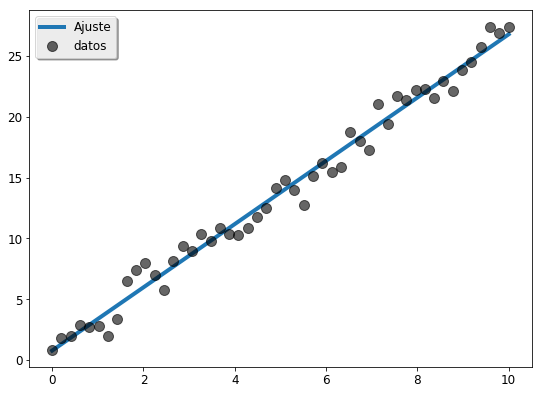

In [58]:
plt.figure(figsize=fsize)
plt.plot(x, p[0]*x + p[1], '-', label='Ajuste')
plt.plot(x,y,'ok', label='datos', alpha=0.6)
plt.legend(loc='best');

Ahora en vez de escribir la recta explícitamente le pedimos a **numpy** que lo hagausando los coeficientes que encontramos mediante el fiteo (función *polyval*)
```python
y = np.polyval(p,x)
```

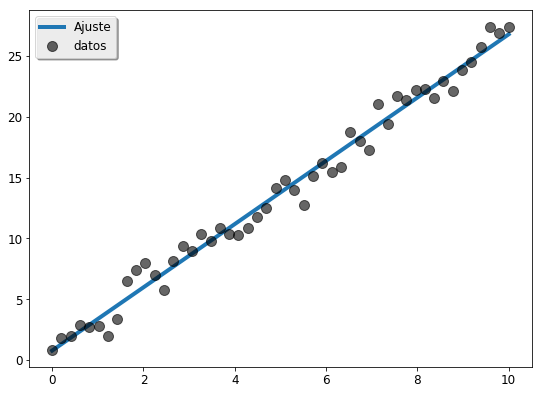

In [59]:
plt.figure(figsize=fsize)
plt.plot(x, np.polyval(p,x), '-', label='Ajuste')
plt.plot(x,y,'ok', label='datos', alpha=0.6)
plt.legend(loc='best');

Si los datos tienen mucho ruido lo que obtenemos es, por supuesto, una recta que pasa por la nube de puntos:

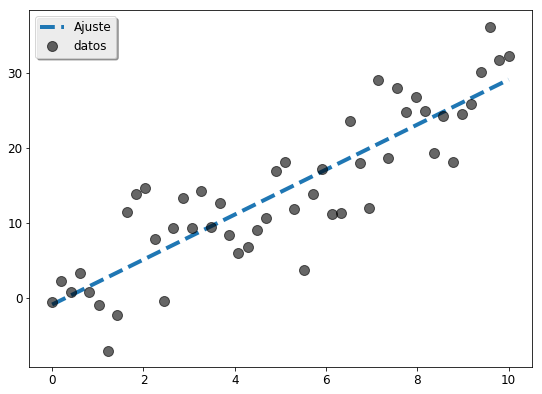

In [60]:
y= y0 + 5*ruido
p = np.polyfit(x, y , 1)
plt.figure(figsize=fsize)
plt.plot(x,np.polyval(p,x),'--', label='Ajuste') 
#plt.plot(x,y0,'.g',label='original')
plt.plot(x,y, 'ok', alpha=0.6, label='datos')
plt.legend(loc='best');

Similarmente podemos usar polinomios de orden superior. Por ejemplo, con parábolas

In [61]:
# Generamos los datos
a = [2.5, 1.4, 3.]
y0 = np.polyval(a,x)
y= y0 + 10*ruido

In [62]:
# Ajustamos con un polinomio de segundo grado
p = np.polyfit(x, y , 2)

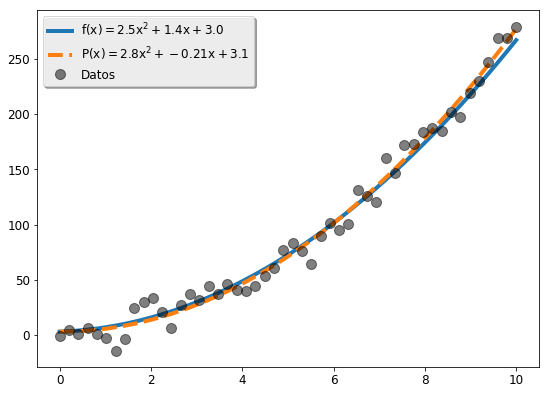

In [63]:
plt.figure(figsize=fsize)
plt.plot(x,y0,'-', label="$f(x)={0:.2}x^2 + {1:.2} x + {2:.2}$".format(*a)) 
plt.plot(x,np.polyval(p,x),'--', label="$P(x)={0:.2}x^2 + {1:.2} x + {2:.2}$".format(*p))
plt.plot(x,y,'ok', alpha=0.5,label='Datos')
plt.legend(loc='best');

## Fiteos  con Scipy

Vamos ahora a fitear una función que no responde a la forma polinomial.

Una función "complicada".

In [64]:
# string definido para la leyenda
sfuncion= r'${0:.3}\, \sin ({1:.2}\, x {3:+.2f}) \, \exp(-{2:.2f} x)$'

def fit_func(x, a, b, c, d):
  y= a*np.sin(b*x-d)*np.exp(-c*x)
  return y

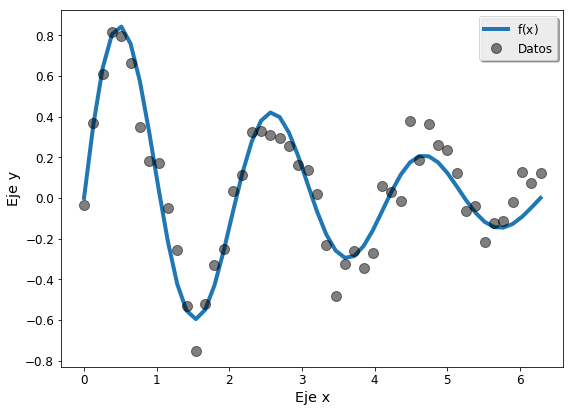

In [65]:
plt.figure(figsize=fsize)
x = np.linspace(0., 2*np.pi, 50)
y0= fit_func(x, 1., 3., 1/3, 0 )
y = y0 + 0.1*ruido
plt.plot(x,y0,'-',label="$f(x)$") 
plt.plot(x,y,'ok',alpha=0.5,label='Datos') # repeated from above
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');

Para eso vamos a utilizar funciones del paquete **Scipy**. 

Veamos que hace la función `curve_fit`

In [66]:
from scipy.optimize import curve_fit

In [67]:
# We need to know what it does:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

Veamos lo que devuelve:


    Returns
    -------
    popt : array
        Optimal values for the parameters so that the sum of the squared error
        of ``f(xdata, *popt) - ydata`` is minimized
    pcov : 2d array
        The estimated covariance of popt.  The diagonals provide the variance
        of the parameter estimate.
    

El primer *array* tiene los parámetros para "best-fit", y el segundo da la estimación del error: la matriz de covarianza

Ahora, definimos una función que vamos a ajustar. 

Los valores están guardados en arrays `x` e `y`

In [68]:
initial_guess= None 
# [1., 1., 1., 0.2]
params, p_covarianza = curve_fit(fit_func, x, y, initial_guess)
params

array([ 0.87455427, -3.02083923,  0.28575763, -3.14342052])

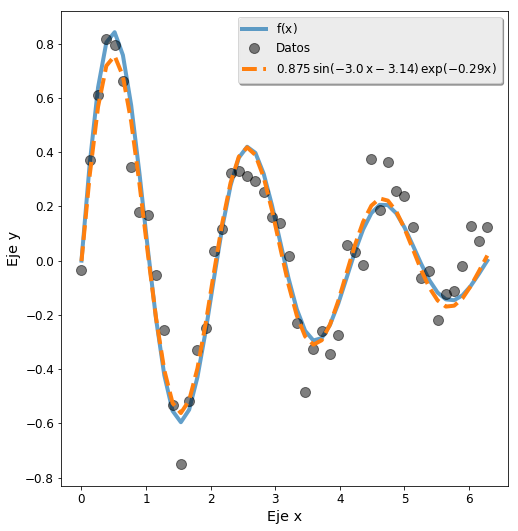

In [69]:
plt.figure(figsize=(8,8))
plt.plot(x,y0,'-', alpha=0.7,label="$f(x)$") 
plt.plot(x,y,'ok', alpha=0.5, label='Datos') # repeated from above
label=sfuncion.format(*params)
plt.plot(x,fit_func(x, *params), '--', label=label)
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');
#plt.ylim((-1.5,2.5))

Veamos otro ejemplo similar, con muchos datos y dispersión

In [70]:
# Puntos "experimentales" con dispersión
x = np.linspace(0., 2*np.pi, 5000)
y0= fit_func(x, 1., 3., 1/3, 0 )
y = y0 + 0.2* np.random.normal(loc= 0., scale= 1, size= y0.size);
# Fiteo

In [71]:
initial_guess= [1., 1., 1., 0.2]
params, p_covarianza = curve_fit(fit_func, x, y, initial_guess)

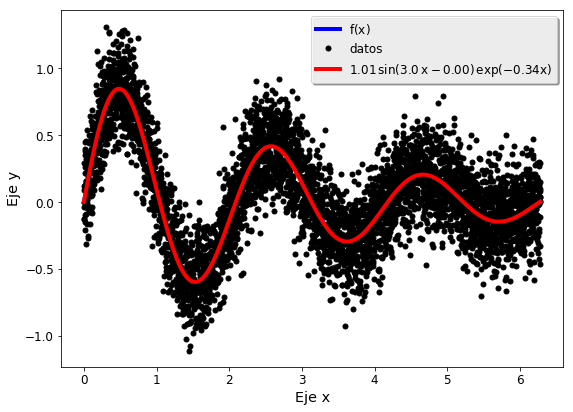

In [73]:
# Graficación
plt.figure(figsize=fsize)
plt.plot(x,y0,'-b',label="$f(x)$") 
plt.plot(x,y,'.k',label='datos') # repeated from above
label=sfuncion.format(*params)
plt.plot(x,fit_func(x, *params), '-r', label=label)
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');

In [74]:
np.diagonal(p_covarianza)

array([1.71310018e-04, 4.19376481e-05, 4.61186624e-05, 1.50808631e-04])

### Ejemplo: Fiteo de picos

Vamos a suponer que los datos son obtenidos mediante la repetición de mediciones

In [75]:
# Realizamos 1000 mediciones, eso nos da una distribución de valores
r = np.random.normal(loc=6, size=1000)

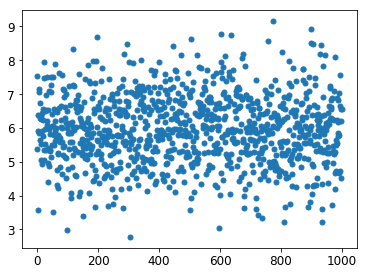

In [76]:
# Veamos qué obtuvimos
plt.plot(r,'.')

In [77]:
y,x = np.histogram(r, bins=30, range=(2,10), density=True)
print('x.size={0}, y.size={1}'.format(x.size, y.size))
x = (x[1:]+x[:-1])/2
print('x.size={0}, y.size={1}'.format(x.size, y.size))

x.size=31, y.size=30
x.size=30, y.size=30


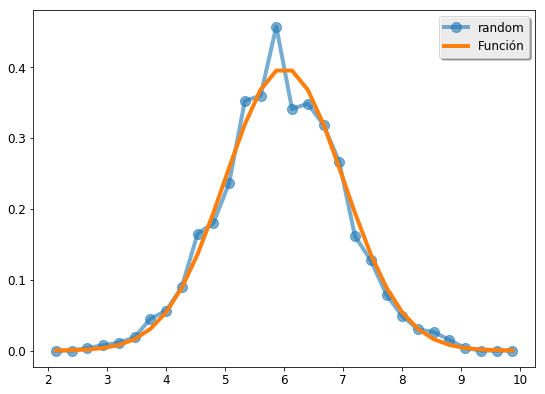

In [78]:
from scipy import stats
b = stats.norm.pdf(x, loc=6)
plt.figure(figsize=fsize)
plt.plot(x,y,'o-', alpha=0.6, label='random')
plt.plot(x,b,'-', label=u'Función')
plt.legend(loc='best');


Con esta idea supongamos que tenemos datos, correspondiente a dos picos, diferentes pero que no podemos distinguirlos completamente porque se superponen. 

In [79]:
npoints= 2000
r = np.r_[np.random.normal(size=npoints), np.random.normal(loc=2, scale=.6, size=npoints)]
y,x = np.histogram(r , bins = 40, range = (-3.5,4.5), density=True)
x = (x[1:]+x[:-1])/2

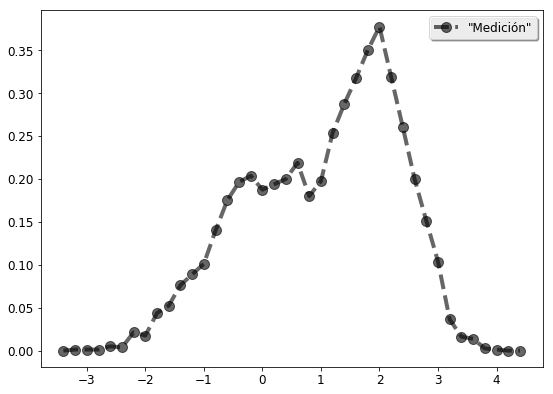

In [80]:
plt.figure(figsize=fsize)
plt.plot(x,y,'o--k', alpha=0.6, label='"Medición"')
plt.legend(loc='best');


Ahora, por razones físicas (o porque no tenemos ninguna idea mejor) suponemos que esta curva corresponde a dos "picos" del tipo Gaussiano, sólo que no conocemos sus posiciones, ni sus anchos ni sus alturas relativas. Creamos entonces una función que describa esta situación: La suma de dos Gaussianas, cada una de ella con su posición y ancho característico, y un factor de normalización diferente para cada una de ella. En total tendremos seis parámetros a optimizar:

In [81]:
def modelo(x, *coeffs):
  "Suma de dos Gaussianas, con pesos dados por coeffs[0] y coeffs[3], respectivamente"
  return coeffs[0]*stats.norm.pdf(x,loc=coeffs[1], scale=coeffs[2]) + \
  coeffs[3]*stats.norm.pdf(x,loc=coeffs[4], scale=coeffs[5])

In [82]:
help(modelo)

Help on function modelo in module __main__:

modelo(x, *coeffs)
    Suma de dos Gaussianas, con pesos dados por coeffs[0] y coeffs[3], respectivamente



Es muy fácil realizar el fiteo. Mirando el gráfico proponemos valores iniciales:

In [83]:
c0 = np.array([1., -0.5, 1., 1., 1.5, 1.])
c, cov = curve_fit(modelo, x, y, p0 = c0)
print(c)

[ 0.48239691 -0.00992456  0.95512334  0.51833717  1.97640726  0.61896662]


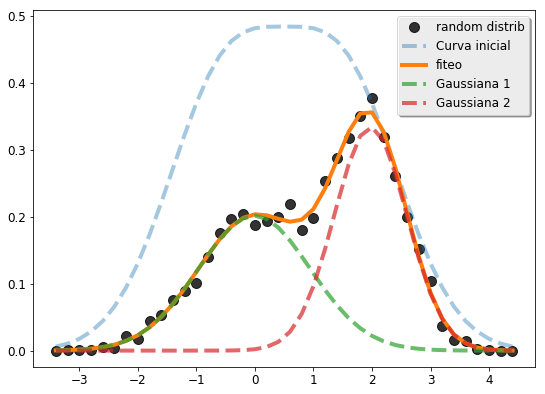

In [85]:
plt.figure(figsize=fsize)
plt.plot(x,y,'ok', alpha=0.8, label='random distrib')
plt.plot(x, modelo(x,*c0), '--', alpha=0.4, label='Curva inicial')
plt.plot(x, modelo(x,*c), '-', label='fiteo')
plt.plot(x,c[0]*stats.norm.pdf(x,loc=c[1], scale=c[2]), '--', alpha=0.7, label='Gaussiana 1')
plt.plot(x,c[3]*stats.norm.pdf(x,loc=c[4], scale=c[5]), '--', alpha=0.7, label='Gaussiana 2')
plt.legend( loc = 'best' );


Real   : (3, 1, 0.5)
Inicial: (1, 4, 1)
Ajuste : [2.99815698 1.00250275 0.50148822]


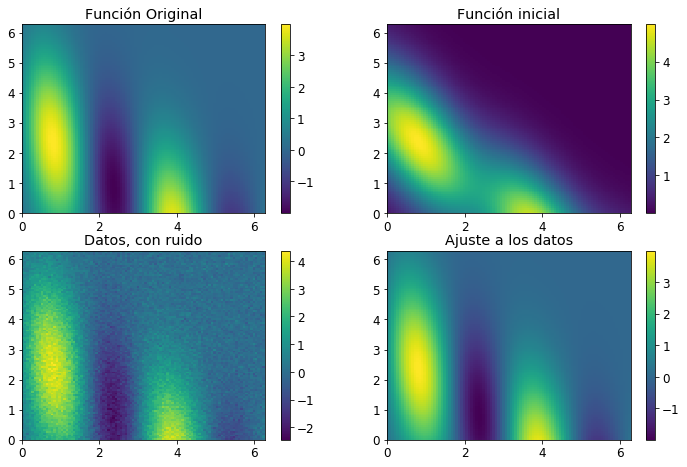

In [86]:
def func(x, a, b, c):
  return (a * np.sin(2 * x[0]) + b) * np.exp(-c * (x[1] + x[0] - np.pi)**2 / 4)


# Límites de los datos y gráficos
limits = [0, 2 * np.pi, 0, 2 * np.pi]  # [x1_min, x1_max, x2_min, x2_max]
side_x = np.linspace(limits[0], limits[1], 100)
side_y = np.linspace(limits[2], limits[3], 100)

# Creamos las grillas
X1, X2 = np.meshgrid(side_x, side_y)
forma = X1.shape
# Los pasamos a unidimensional
x1_1d = X1.reshape((1, np.prod(forma)))
x2_1d = X2.reshape((1, np.prod(forma)))

# xdata[0] tiene los valores de x
# xdata[1] tiene los valores de y
xdata = np.vstack((x1_1d, x2_1d))

# La función original que vamos a ajustar.
# Sólo la usamos para comparar el resultado final con el deseado
original = (3, 1, 0.5)
z = func(xdata, *original)
Z = z.reshape(forma)

# Le agregamos ruido. Estos van a ser los datos a ajustar
z_noise = z + .2 * np.random.randn(len(z))
Z_noise = z_noise.reshape(forma)

# Hacemos el fiteo
ydata = z_noise
p0 = (1, 4, 1)
popt, pcov = curve_fit(func, xdata, ydata, p0=p0)

print("Real   : {}\nInicial: {}\nAjuste : {}".format(original, p0, popt))

z_0 = func(xdata, *p0)
Z_0 = z_0.reshape(forma)

z_fit = func(xdata, *popt)
Z_fit = z_fit.reshape(forma)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

titulos = [["Función Original", "Función inicial"],
           ["Datos, con ruido", "Ajuste a los datos"]]

datos = [[Z, Z_0], [Z_noise, Z_fit]]

for k, a in np.ndenumerate(titulos):

  ax[k[0], k[1]].set_title(a)
  im = ax[k[0], k[1]].pcolormesh(X1, X2, datos[k[0]][k[1]])
  ax[k[0], k[1]].axis(limits)
  fig.colorbar(im, ax=ax[k[0], k[1]])
